In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
import csv
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go2
import math
import zipfile
import pandas as pd
import statistics
from statistics import mean
from sklearn import feature_selection as fs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("train_precessed.csv")
df_test = pd.read_csv("test_precessed.csv")

In [3]:
df_label = df['CreditScore']
df_data = df.drop('CreditScore', axis=1) 
df_data = df_data.iloc[:,:17]
df_data

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_14,col_15,col_16,col_18,col_19,col_21
0,22,8557.39,797.115833,8,6,22,2,37,15.0,7.64,7.0,1767.29,25.400823,143,13.168404,91.952879,264.590301
1,37,19718.92,1676.243333,10,9,19,6,27,11.0,13.02,13.0,2057.56,28.642449,197,64.066440,107.668408,285.889485
2,33,32045.78,2677.481667,6,9,30,7,10,10.0,17.19,11.0,1333.18,30.053861,76,169.770374,62.681178,285.296615
3,42,62976.28,5321.023333,0,3,12,0,9,0.0,6.05,3.0,68.66,40.661773,191,0.000000,70.780837,711.321496
4,39,57818.72,4864.226667,7,7,21,2,56,16.0,4.09,12.0,2348.77,37.882655,174,73.709570,395.136222,307.576874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85264,41,9795.07,586.255833,7,8,29,6,62,19.0,4.01,15.0,2065.27,34.916611,67,42.605317,43.529548,242.490718
85266,46,110607.09,8997.257500,4,4,2,3,2,9.0,4.26,6.0,1174.05,24.781202,265,154.824136,232.178801,752.722813
85267,50,96275.84,8101.986667,6,6,19,1,7,18.0,2.94,5.0,999.36,28.339005,321,64.961337,129.831967,855.405363
85268,55,69388.26,5543.355000,2,4,6,0,8,1.0,14.16,2.0,819.98,40.497795,266,0.000000,184.212607,640.122893


In [4]:
xtrain , xtest , ytrain , ytest = train_test_split(df_data,df_label,test_size=0.2,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11, kernel_initializer='uniform', activation='relu', input_dim=17))

# Adding the second hidden layer
classifier.add(Dense(units=11, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\JIYAO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
classifier.fit(xtrain, ytrain, batch_size=10, epochs=100)

Epoch 1/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 6s 846us/step - accuracy: 0.1747 - loss: -107.3056
Epoch 2/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 4s 798us/step - accuracy: 0.1725 - loss: -2528.8582
Epoch 3/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 5s 803us/step - accuracy: 0.1906 - loss: -10316.4355
Epoch 4/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - accuracy: 0.2007 - loss: -25060.1055
Epoch 5/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - accuracy: 0.2039 - loss: -53571.2188
Epoch 6/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 5s 938us/step - accuracy: 0.1932 - loss: -89730.8672
Epoch 7/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2147 - loss: -137503.8125
Epoch 8/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - accuracy: 0.2141 - loss: -223811.4844
Epoch 9/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - accuracy: 0.2383 - loss: -300879.8438
Epoch 10/100
5581/5581 ━━━━━━━━━━━━━━━━━━━━ 5s 955us/step - accuracy: 0.2183 - loss: -398414.8750
Epoch 11/100
5581/5581 ━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(xtest)

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step


accuracy of the model:  0.24557379399326212


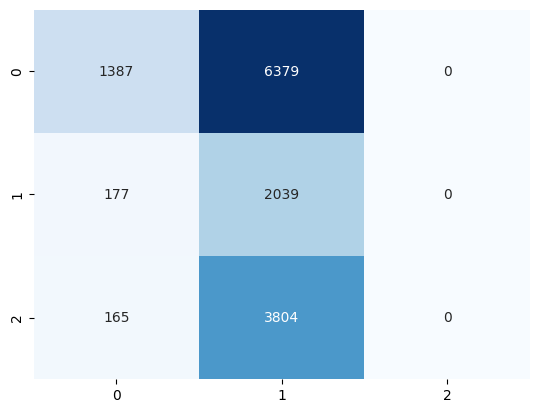

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest, y_pred.round())
print('accuracy of the model: ',ac)